In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import fit_analysis as fa

In [2]:
path = '/home/kernfel/Documents/Data/RTDO/B1M/sessions/2019.12.12-11.17.42/'

This session contains two sets of closed-loop simulation tests:
- First, on 12.12., files 0000-0047 (8x5 fits), testing different relative weightings of the cost components while fitting against a noise-free target. Parameter range is +10mV/50%. Weightings for trace, SDF, and delay map are as follows:
    - 0001-0005: 1/0/1
    - 0007-0011: 2/0/1
    - 0013-0017: 4/0/1
    - 0019-0023: 1/0/2
    - 0025-0029: 1/0/4
    - 0031-0035: 1/500/4
    - 0037-0041: 1/1000/4
    - 0043-0047: 1/250/4
- Second, on 12.16., files 0050-0097 (8x5 fits), testing different permitted parameter ranges under noisy conditions. Weights were 1/500/4 throughout. Four range widths (+10/*0.5; +5/*0.25; +2.5/*0.125; +1/*0.05) and two noise levels (2 nA; 5 nA) were tested. Global sigma was reduced concomitantly with the range manipulation.
    - 0051-0055: 2 nA, +10
    - 0057-0061: 2 nA, +5
    - 0063-0067: 2 nA, +2.5
    - 0069-0073: 2 nA, +1
    - 0075-0079: 5 nA, +10
    - 0081-0085: 5 nA, +5
    - 0087-0091: 5 nA, +2.5
    - 0093-0097: 5 nA, +1

In [5]:
files = [f for f in os.listdir(path) if f.endswith('.cost.bin')]
# files

In [ ]:

for f in files[:40]:
    data = np.fromfile(path + f, dtype=np.dtype(np.float32)).reshape(-1, 3, 8192)
    plt.figure(figsize=(16,4))
    plt.subplot(2,1,1)
    minima = np.min(data, axis=2).T
    plt.plot(minima[0], label='trace')
    plt.plot(minima[1], label='sdf')
    plt.plot(minima[2], label='dmap')
    plt.title(f)
    plt.legend()

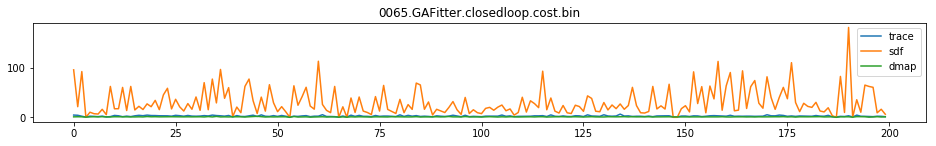

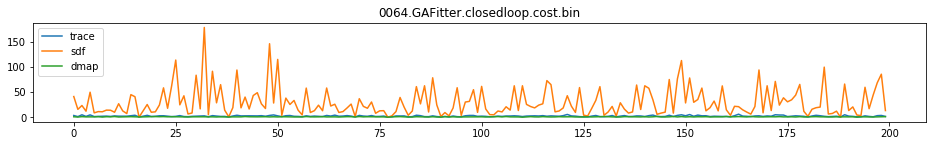

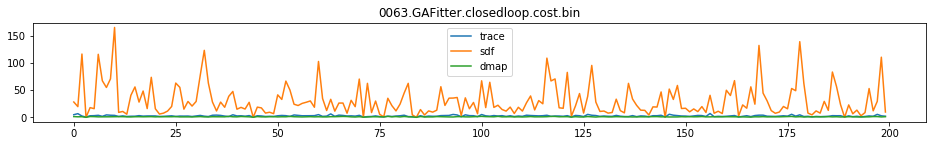

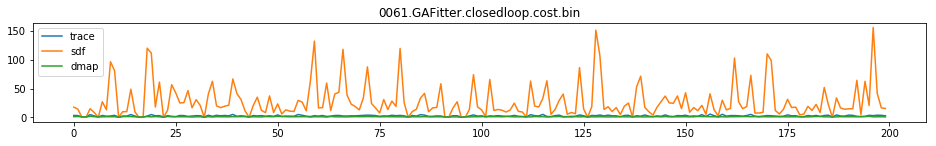

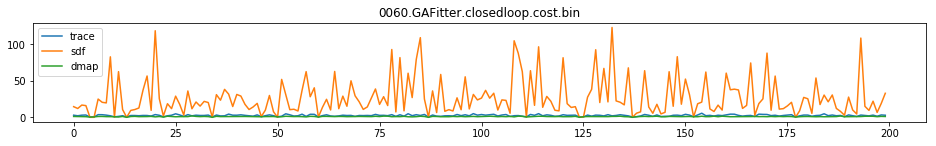

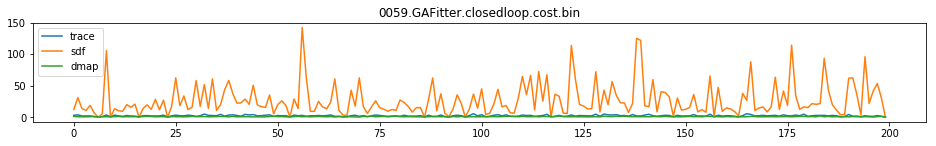

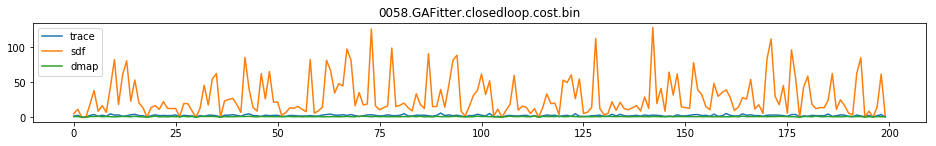

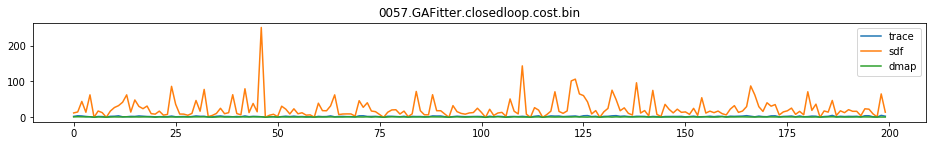

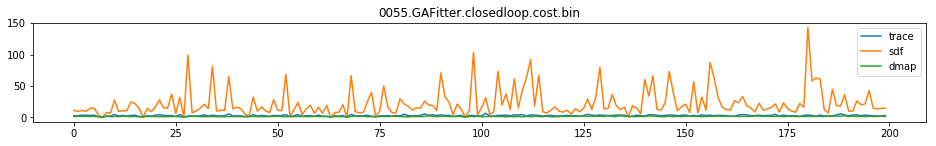

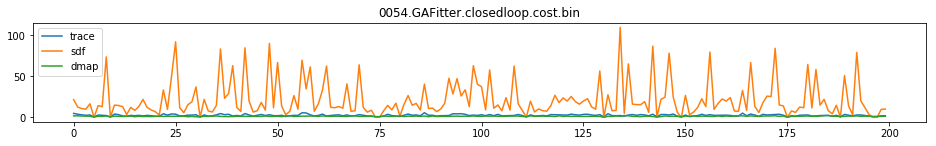

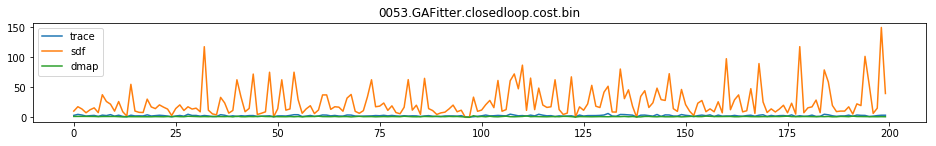

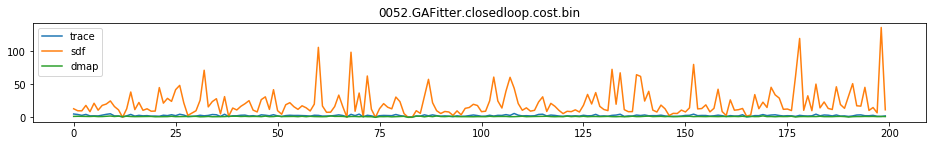

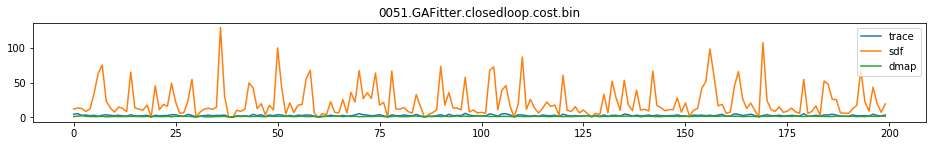

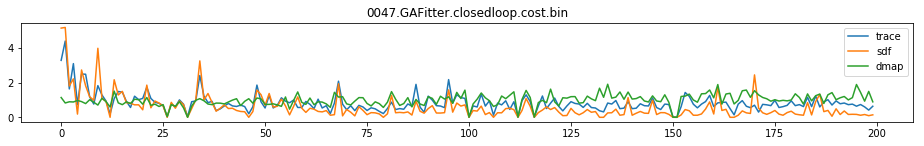

In [7]:
for f in files[:-15:-1]:
    try:
        data = np.fromfile(path + f, dtype=np.dtype(np.float32)).reshape(-1, 3, 8192)
        plt.figure(figsize=(16,4))
        plt.subplot(2,1,1)
        minima = np.min(data, axis=2).T
        plt.plot(minima[0], label='trace')
        plt.plot(minima[1], label='sdf')
        plt.plot(minima[2], label='dmap')
        plt.title(f)
        plt.legend()
        
#         plt.ylim(0,5)
        
#         plt.subplot(2,1,2)
#         means = np.mean(data, axis=2).T
#         plt.plot(means[0], label='trace')
# #         plt.plot(means[1], label='sdf')
#         plt.plot(means[2], label='dmap')
    except:
        print "Failed to plot %s" % f